In [1]:
import os


# comment char
_COMMENT_CHAR = '#'


def read_list_from_file(fn: str, items_per_line=None, separator=None, comment_char=_COMMENT_CHAR):
    """
    Read a list from given file
    Note: list file is organized by lines, comments are started with _COMMENT_CHAR
    :param fn: file name
    :param items_per_line: number of items per line
    :param separator: separator. Using space char when None
    :param comment_char: char indicating comment
    :return:
    """
    def get_items(src_line: str):
        if items_per_line is None:
            items = src_line.split(separator)
        else:
            items = src_line.split(separator, items_per_line)[: items_per_line]
        return items[0] if len(items) == 1 else items

    # check parameters
    assert os.path.exists(fn)
    assert (items_per_line is None) or (items_per_line > 0)
    # store result
    result = []
    # read file
    with open(fn, 'r') as f:
        # handle lines
        while True:
            line = f.readline()
            if not line:
                break
            line = line.strip()
            if line.startswith(comment_char):
                continue
            result.append(get_items(line))
    # return result
    return result

In [7]:
fn = "/media/aiteam/DataAI/STEPS/split_files/robotcar/2014-12-16-18-44-24/test_split.txt"
files = read_list_from_file(fn, 1)
print(len(files))
print(files[:20])

411
['1418757162925551', '1418757162988042', '1418757163050532', '1418757163113023', '1418757163175517', '1418757163238009', '1418757163300500', '1418757163362990', '1418757163425483', '1418757163487974', '1418757163550466', '1418757163612958', '1418757163675448', '1418757163737939', '1418757163800433', '1418757163862923', '1418757163925416', '1418757163987906', '1418757164050399', '1418757164112891']


In [2]:
import cv2
im = cv2.imread("/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636269527.png")

In [25]:
import matplotlib.pyplot as plt
import numpy as np

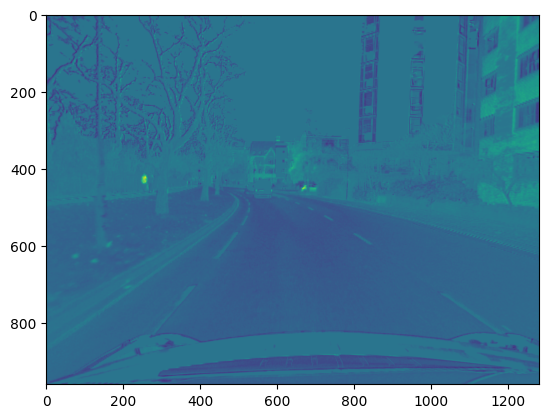

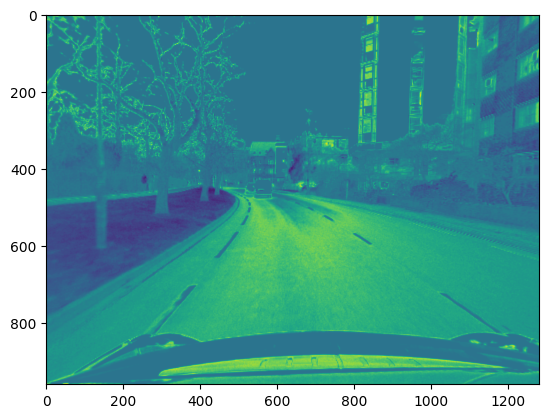

[221 240   9 ... 108  14  80]


In [22]:
im_ycbcr1 = cv2.cvtColor(im, cv2.COLOR_RGB2YCrCb)
plt.imshow(im_ycbcr1[:,:,2])
plt.show()

im_ycbcr2 = cv2.cvtColor(im, cv2.COLOR_BGR2YCrCb)
plt.imshow(im_ycbcr2[:,:,2])
plt.show()

print(sum(im_ycbcr1[:,:,0] - im_ycbcr2[:,:,0]))

In [49]:

def rgb2yCbCr(input_im):
    # Ensure input is in the range [0, 255]
#     input_im = np.clip(input_im, 0, 255)

    # Flatten the input image and convert to float
    im_flat = input_im.reshape(-1, 3).astype(np.float32)

    # Define the transformation matrix for RGB to YCbCr conversion
    mat = np.array([[0.299, 0.587, 0.114],
                    [-0.169, -0.331, 0.500],
                    [0.500, -0.419, -0.081]], dtype=np.float32)

    # Define the bias values for RGB to YCbCr conversion
    bias = np.array([0.0, 128.0, 128.0], dtype=np.float32)

    # Perform the RGB to YCbCr conversion using matrix multiplication and addition
    temp = np.dot(im_flat, mat.T) + bias

    # Reshape the result back to the original image shape
    out = temp.reshape(input_im.shape)

    # Clip the output to ensure it is in the range [0, 255]
#     out = np.clip(out.astype(int), 0, 255)

    return out


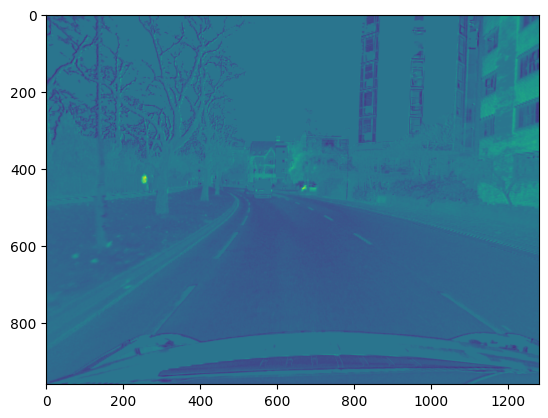

In [50]:
im_rgb2yCbCr = rgb2yCbCr(im)
plt.imshow(im_rgb2yCbCr[:,:,1])
plt.show()

In [54]:
np.max(im_rgb2yCbCr)

255.0

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
image = cv2.imread("/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-16-18-44-24/test_adds/0000029785.png")

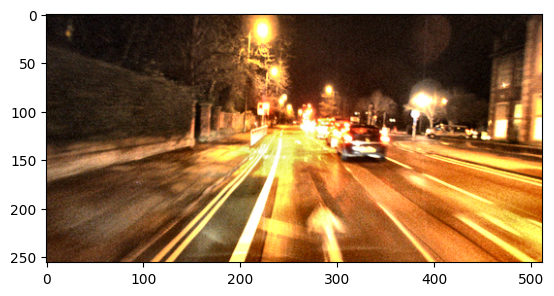

In [27]:
plt.imshow(image[:,:,::-1])


In [28]:
def draw_grid(image, grid_size = (64, 32)):
    _image = image.copy()
    im_h, im_w, _ = image.shape
    
    cell_width = im_w // grid_size[0]
    cell_height = im_h // grid_size[1]
    
    
    # Define grid parameters
    grid_color = (0, 255, 0)
    grid_line_thickness = 1

    # Draw vertical grid lines
    for x in range(0, im_w, cell_width):
        cv2.line(_image, (x, 0), (x, im_h), grid_color, grid_line_thickness)

    # Draw horizontal grid lines
    for y in range(0, im_h, cell_height):
        cv2.line(_image, (0, y), (im_w, y), grid_color, grid_line_thickness)
    return _image


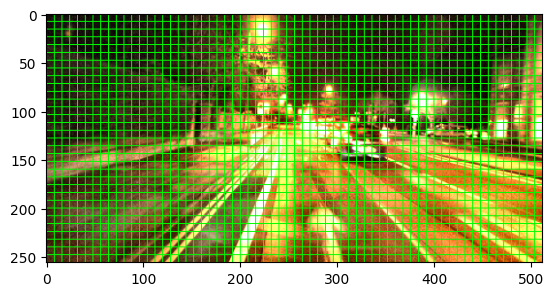

In [29]:
plt.imshow(draw_grid(image, (64,32))[:,:,::-1])


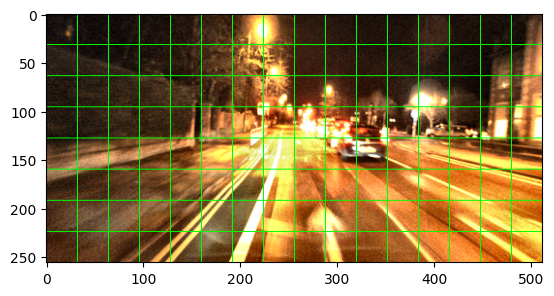

In [31]:
plt.imshow(draw_grid(image, grid_size = (16,8))[:,:,::-1])


In [33]:
depth = cv2.imread("/media/aiteam/DataAI/test/Night-Depth-Estimation/vis/steps_rc_night/00015_depth.png")

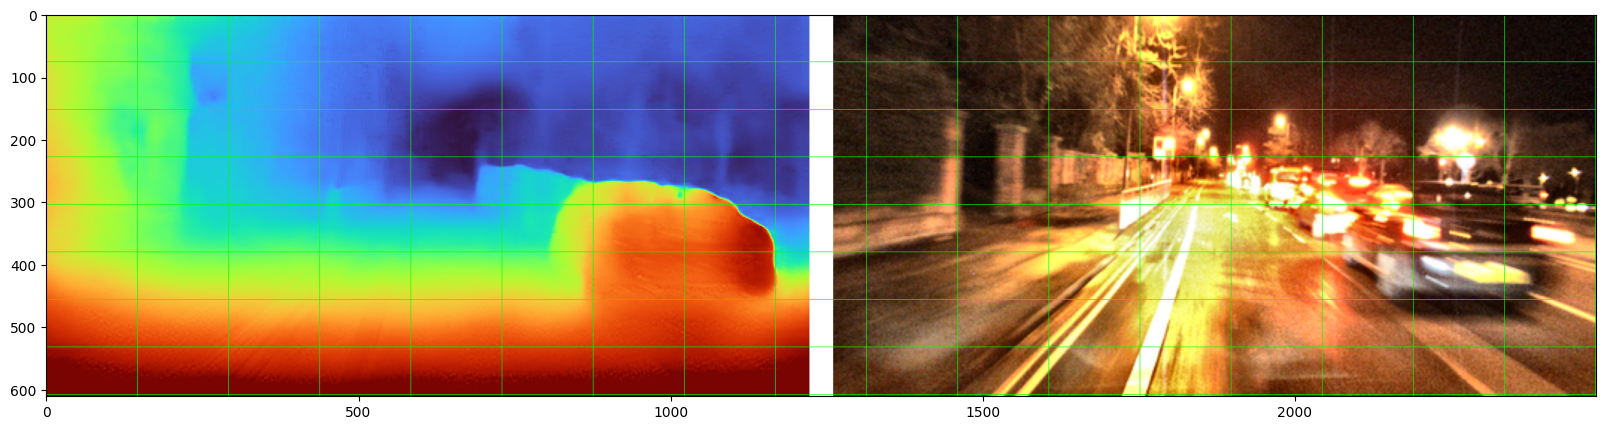

In [39]:
plt.figure(figsize=(20,10))
plt.imshow(draw_grid(depth, grid_size = (17,8))[:,:,::-1])


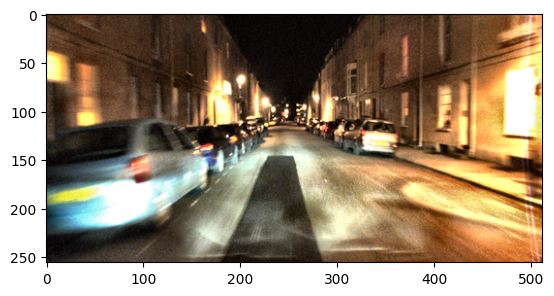

In [128]:
image_loss = torch.load('/media/aiteam/DataAI/test/Night-Depth-Estimation/vis/error_loss_night/image_242.pth').permute(1,2,0).numpy()
plt.imshow(image_loss[:,:,::-1])

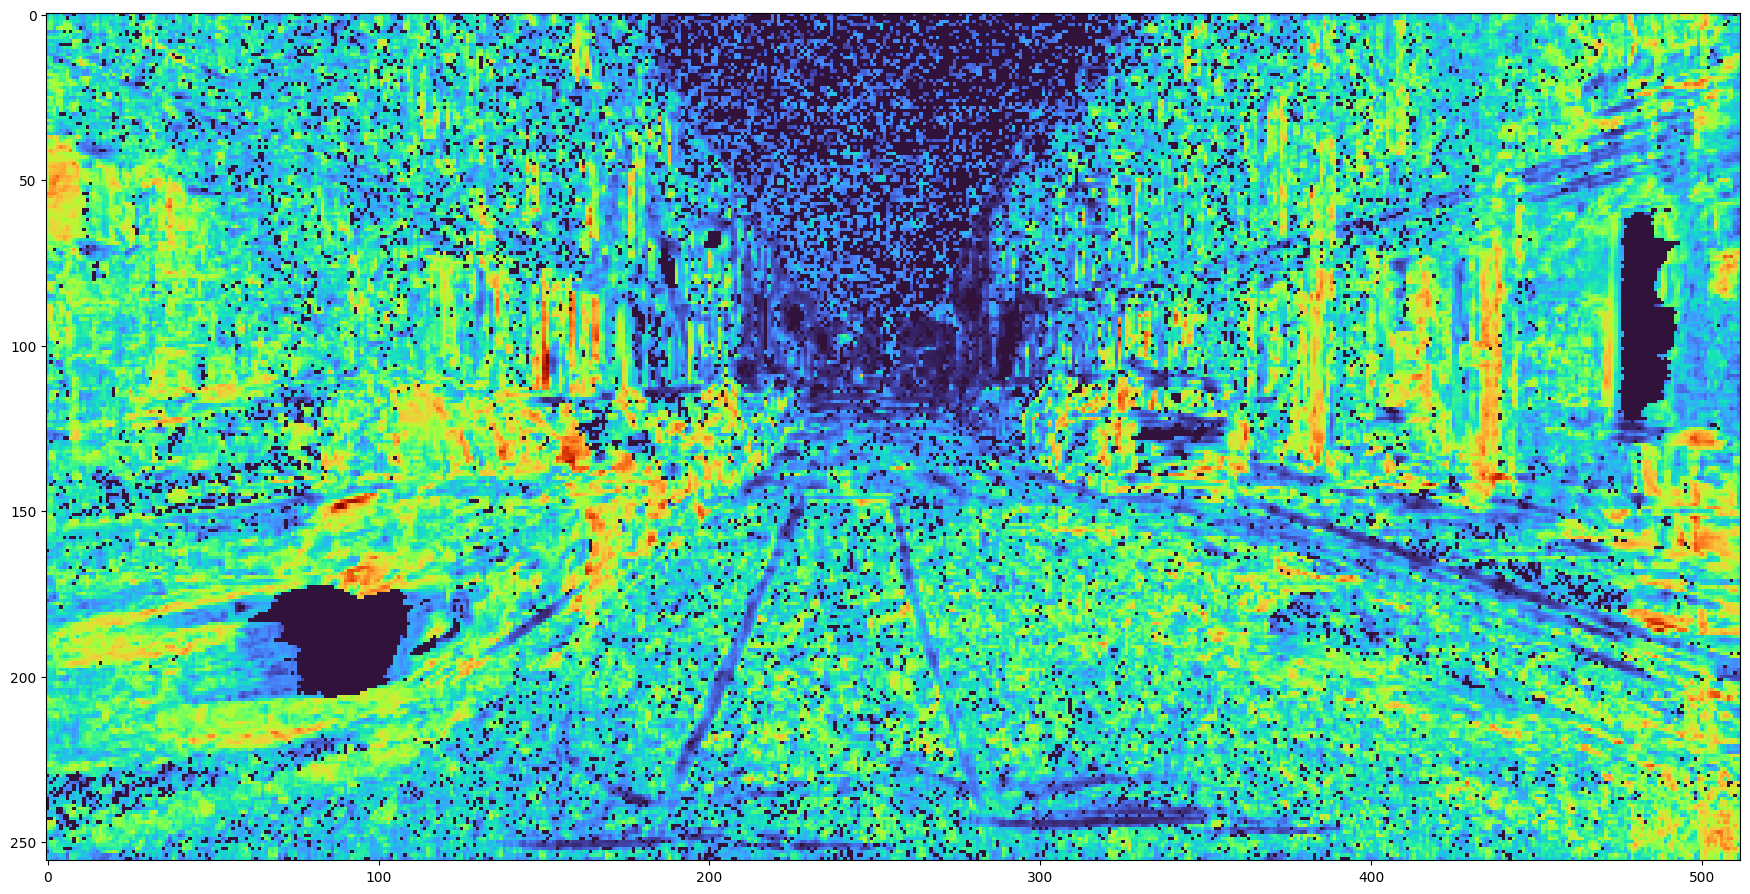

In [133]:
reconstruction_loss = torch.load('/media/aiteam/DataAI/test/Night-Depth-Estimation/vis/error_loss_night/loss_242.pth').detach().numpy()
plt.figure(figsize=(22,11))
plt.imshow(reconstruction_loss, cmap='turbo')

In [107]:
from utils import read_list_from_file

In [108]:
read_list_from_file("/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-16-18-44-24/test_split_adds.txt")

['0000029783',
 '0000029784',
 '0000029785',
 '0000029786',
 '0000029787',
 '0000029788',
 '0000029789',
 '0000029790',
 '0000029791',
 '0000029792',
 '0000029793',
 '0000029794',
 '0000029795',
 '0000029796',
 '0000029797',
 '0000029798',
 '0000029799',
 '0000029800',
 '0000029801',
 '0000029802',
 '0000029803',
 '0000029804',
 '0000029805',
 '0000029806',
 '0000029807',
 '0000029808',
 '0000029809',
 '0000029810',
 '0000029811',
 '0000029812',
 '0000029813',
 '0000029814',
 '0000030111',
 '0000030112',
 '0000030113',
 '0000030114',
 '0000030115',
 '0000030116',
 '0000030117',
 '0000030118',
 '0000030119',
 '0000030120',
 '0000030121',
 '0000030122',
 '0000030123',
 '0000030124',
 '0000030125',
 '0000030126',
 '0000030127',
 '0000030128',
 '0000030129',
 '0000030130',
 '0000030131',
 '0000030132',
 '0000030133',
 '0000030134',
 '0000030135',
 '0000030136',
 '0000030137',
 '0000030138',
 '0000030139',
 '0000030140',
 '0000030141',
 '0000030142',
 '0000030143',
 '0000030144',
 '00000301